In [1]:
import numpy as np
import pandas as pd

In [2]:
with open("./IMA_mineral_names.txt", 'r') as f:
    names = [line.strip().lower() for line in f]

In [3]:
df = pd.DataFrame({'name' : names})

In [4]:
df['set'] = df['name'].apply(set)
df['letter_set'] = df['name'].apply(lambda x: "".join(sorted(set(x))))
df['letter_len'] = df['name'].apply(len)
df['set_len'] = df['set'].apply(len)

In [5]:
df.head()

,name,set,letter_set,letter_len,set_len
0,abellaite,"{b, l, e, a, t, i}",abeilt,9,6
1,abelsonite,"{s, b, l, e, o, a, t, n, i}",abeilnost,10,9
2,abernathyite,"{h, b, r, e, y, a, t, n, i}",abehinrty,12,9
3,abhurite,"{h, b, r, e, u, a, t, i}",abehirtu,8,8
4,abramovite,"{b, r, e, m, o, a, t, v, i}",abeimortv,10,9


{3: 2,
 4: 21,
 5: 102,
 6: 400,
 7: 991,
 8: 1713,
 9: 2365,
 10: 2771,
 11: 3011,
 12: 3120,
 13: 3172,
 14: 3184,
 15: 3187}

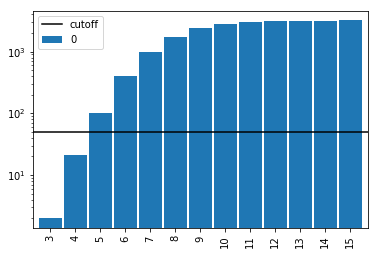

In [6]:
%matplotlib inline
ax = pd.DataFrame.from_dict({num : (np.array(list(map(len, df['letter_set'].unique()))) <= num).sum() for num in range(3,16)}, orient='index').plot.bar(width=0.9)
ax.axhline(50, color='k', label='cutoff')
ax.legend()
ax.set_yscale('log')
{num : (np.array(list(map(len, df['letter_set'].unique()))) <= num).sum() for num in range(3,16)}

In [7]:
%%time
combinations = {}
n = len(df['letter_set'].unique())
# skip combinations if set_len > 4 (40 first items) or combination set is over 15
len_and_letters = sorted(zip(list(map(len, df['letter_set'].unique())), df['letter_set'].unique()), reverse=False)
for i, (len_let, letters) in enumerate(len_and_letters, 1):
    if len_let > 4 and i > 40:
        if letters not in combinations:
            combinations[letters] = letters_set
        continue
    print("\r{} / {} --> {}".format(i, n, len(combinations)), end='')
    letters_set = set(letters)
    for comb, comb_set in combinations.copy().items():
        union = letters_set.union(comb_set)
        if len(union) > 15:
            continue
        union_str = "".join(sorted(union))
        if union_str not in combinations:
            combinations[union_str] = union
    if letters not in combinations:
        combinations[letters] = letters_set
print()
len(combinations)      

40 / 3187 --> 119715
CPU times: user 4.49 s, sys: 127 ms, total: 4.62 s
Wall time: 4.64 s


In [8]:
%%time
subset_groups = {key : [] for key in combinations.keys()}
n = len(df['letter_set'])
for i, group in enumerate(np.sort(df['letter_set']),1):
    print("\r{} / {} --> {}".format(i, n, len(subset_groups)), end='')
    mineral_names = list(df.loc[df['letter_set'] == group, 'name'].values)
    group_set = set(group)
    # check if minerals can be put inside different subgroups
    for key, let_set in combinations.items():
        if let_set.issuperset(group_set):
            subset_groups[key].extend(mineral_names)            
print()
subset_groups = {key : sorted(set(values)) for key, values in subset_groups.items()}

3912 / 3912 --> 122092
CPU times: user 5min, sys: 2.99 s, total: 5min 3s
Wall time: 5min 3s


In [9]:
subset_groups_len = {}
subset_groups_relative_len = {}
subset_len = {}
for key in sorted(subset_groups, reverse=True):
    subset_len[key] = len(key)
    subset_groups_len[key] = len(subset_groups[key])
    subset_groups_relative_len[key] = len(subset_groups[key])/len(key)

In [10]:
df_subsets = pd.DataFrame.from_dict({
        'subset_groups' : subset_groups,
        'len' : subset_len,
        'set_len' : subset_groups_len,
        'relative_len' : subset_groups_relative_len
        }).reset_index(drop=False)
df_subsets.rename(columns={'index' : 'name'}, inplace=True)

In [11]:
df_subsets.sort_values(by='relative_len', ascending=False).head(50)

,name,len,relative_len,set_len,subset_groups
2621,abcdegilmnorstu,15,72.933333,1094,"[abellaite, abelsonite, abuite, acetamide, acm..."
14510,abcegiklmnorstu,15,71.400000,1071,"[abellaite, abelsonite, abuite, actinolite, ac..."
31698,abdegiklmnorstu,15,70.333333,1055,"[abellaite, abelsonite, abuite, adamite, adeli..."
62515,acdegiklmnorstu,15,70.333333,1055,"[acetamide, acmonidesite, actinolite, acuminit..."
64832,acdegilmnoprstu,15,70.200000,1053,"[acetamide, acmonidesite, actinolite, acuminit..."
61811,acdefhilmnorstu,15,69.266667,1039,"[acanthite, acetamide, achalaite, acmonidesite..."
73473,acefghilmnorstu,15,69.266667,1039,"[acanthite, achalaite, actinolite, acuminite, ..."
5819,abcdeiklmnorstu,15,68.466667,1027,"[abellaite, abelsonite, abuite, acetamide, acm..."
74145,acefhiklmnorstu,15,68.333333,1025,"[acanthite, achalaite, actinolite, acuminite, ..."
17629,abcegilmnoprstu,15,68.266667,1024,"[abellaite, abelsonite, abuite, actinolite, ac..."


# Results

##### Notice, the results are incomplete (probably not even optimal)
the results are missing all the combined permutations, so only groups that are formed from mineral names and combinations of 4 (+some 5) unique letters are compared here

In [12]:
max_group_for_size = df_subsets.groupby(by='len').apply(lambda x: pd.Series({'group_len' : x['set_len'].max(),
                                                                             'group' : x.loc[x['set_len'].argmax(), 'name'],
                                                                             'list_group' : x.loc[x['set_len'].argmax(), 'subset_groups'],
                                                                             'relative_len' : x['set_len'].max()/len(x.loc[x['set_len'].argmax(), 'name'])
                                                                            })).reset_index(drop=False)
max_group_for_size['group_and_len'] = max_group_for_size.apply(lambda  x: "{} - {}".format(x['group'], x['len']), axis=1)
max_group_for_size

,len,group,group_len,list_group,relative_len,group_and_len
0,3,cei,1,[ice],0.333333,cei - 3
1,4,eilt,2,"[eitelite, leiteite]",0.500000,eilt - 4
2,5,eilst,10,"[eitelite, ellisite, ilesite, iltisite, iseite...",2.000000,eilst - 5
3,6,aeilst,25,"[aliettite, altaite, altisite, asisite, ateles...",4.166667,aeilst - 6
4,7,aeilnst,54,"[aliettite, altaite, altisite, anilite, asisit...",7.714286,aeilnst - 7
5,8,aeilmnst,82,"[aliettite, altaite, altisite, amesite, ammine...",10.250000,aeilmnst - 8
6,9,aeilnorst,138,"[aerinite, aiolosite, alarsite, aliettite, all...",15.333333,aeilnorst - 9
7,10,aeilmnorst,239,"[aerinite, aiolosite, alamosite, alarsite, ali...",23.900000,aeilmnorst - 10
8,11,aegilmnorst,350,"[aegirine, aenigmatite, aerinite, agaite, agma...",31.818182,aegilmnorst - 11
9,12,adegilmnorst,492,"[adamite, adelite, admontite, adranosite, adri...",41.000000,adegilmnorst - 12


In [13]:
max_group_len = {}
for index, row in max_group_for_size.iterrows():
    max_group_len[row['len']] = row['list_group']
    if row['group_len'] < 100:
        print()
        print(row['group'])
        print(row['list_group'])


cei
['ice']

eilt
['eitelite', 'leiteite']

eilst
['eitelite', 'ellisite', 'ilesite', 'iltisite', 'iseite', 'itsiite', 'leiteite', 'lisetite', 'seelite', 'stilleite']

aeilst
['aliettite', 'altaite', 'altisite', 'asisite', 'atelestite', 'eitelite', 'ellisite', 'ilesite', 'iltisite', 'iseite', 'itsiite', 'lasalite', 'leiteite', 'lisetite', 'salesite', 'sasaite', 'seelite', 'sellaite', 'stilleite', 'stistaite', 'tassieite', 'teallite', 'tiettaite', 'tilasite', 'tsilaisite']

aeilnst
['aliettite', 'altaite', 'altisite', 'anilite', 'asisite', 'atelestite', 'eitelite', 'ellisite', 'enstatite', 'esseneite', 'ilesite', 'iltisite', 'inesite', 'innelite', 'iseite', 'itsiite', 'lasalite', 'leiteite', 'lenaite', 'lillianite', 'linnaeite', 'lintisite', 'lisetite', 'nasinite', 'natanite', 'natisite', 'nealite', 'nelenite', 'nielsenite', 'nisnite', 'salesite', 'santanaite', 'santite', 'sasaite', 'seelite', 'sellaite', 'silinaite', 'stannite', 'stilleite', 'stistaite', 'taenite', 'tantite', 'tassiei

In [14]:
max_group_for_size_and_friends = df_subsets.groupby(by='len').apply(lambda x: pd.DataFrame({'group_len' : x.loc[x['set_len'] == x['set_len'].max(), 
                                                                                                          'set_len'],
                                                                                            'group' : x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                            'name'],
                                                                                            'list_group' : x.loc[x['set_len'] == x['set_len'].max(), 
                                                                                                                 'subset_groups'],
                                                                                            'relative_len' : x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                                                   'set_len'] / \
                                                                                                             x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                                   'name'].apply(len),
                                                                                           })).reset_index(drop=False)
max_group_for_size_and_friends.drop(['level_1'], axis=1, inplace=True)
max_group_for_size_and_friends['group_and_len'] = max_group_for_size_and_friends.apply(lambda  x: "{} - {}".format(x['group'], x['len']), axis=1)
max_group_for_size_and_friends

,len,group,group_len,list_group,relative_len,group_and_len
0,3,cei,1,[ice],0.333333,cei - 3
1,3,int,1,[tin],0.333333,int - 3
2,4,eilt,2,"[eitelite, leiteite]",0.500000,eilt - 4
3,4,eint,2,"[teineite, tin]",0.500000,eint - 4
4,4,eiot,2,"[itoite, ottoite]",0.500000,eiot - 4
5,4,eist,2,"[iseite, itsiite]",0.500000,eist - 4
6,4,eitw,2,"[tewite, wittite]",0.500000,eitw - 4
7,5,eilst,10,"[eitelite, ellisite, ilesite, iltisite, iseite...",2.000000,eilst - 5
8,6,aeilst,25,"[aliettite, altaite, altisite, asisite, ateles...",4.166667,aeilst - 6
9,6,aeinst,25,"[asisite, enstatite, esseneite, inesite, iseit...",4.166667,aeinst - 6


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Max only

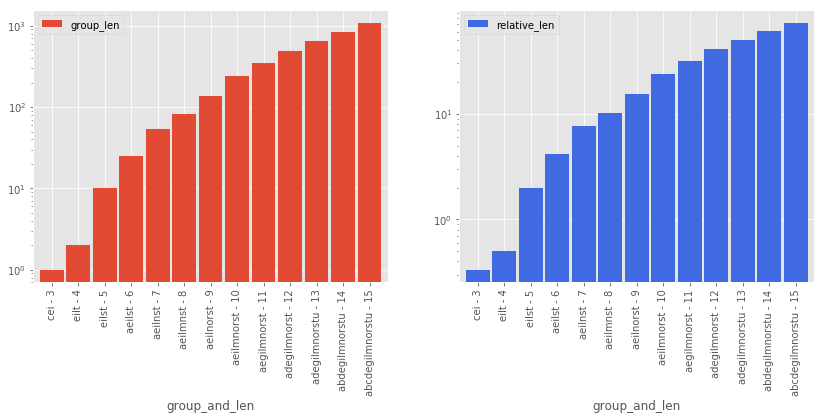

In [16]:
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(121)
ax = max_group_for_size.plot.bar(x='group_and_len', y='group_len', width=0.9, ax=ax)
ax.set_yscale('log')

ax = plt.subplot(122)
ax = max_group_for_size.plot.bar(x='group_and_len', y='relative_len', width=0.9, ax=ax, color='royalblue')
ax.set_yscale('log')


# Max and friends

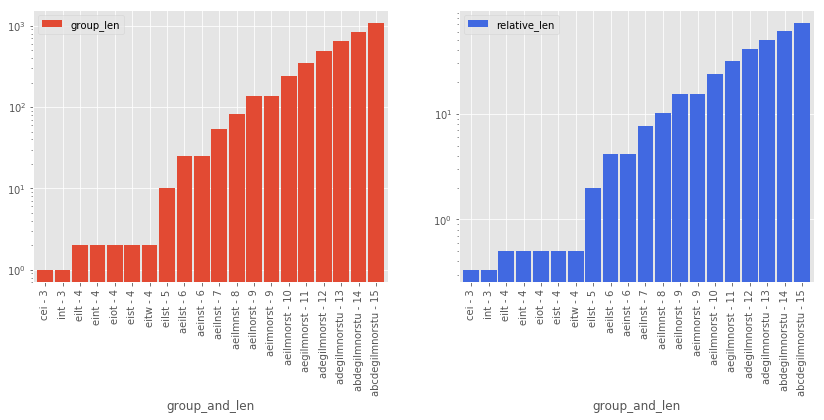

In [17]:
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(121)
ax = max_group_for_size_and_friends.plot.bar(x='group_and_len', y='group_len', width=0.9, ax=ax)
ax.set_yscale('log')

ax = plt.subplot(122)
ax = max_group_for_size_and_friends.plot.bar(x='group_and_len', y='relative_len', width=0.9, ax=ax, color='royalblue')
ax.set_yscale('log')